# 📊 Assignment: Predicting 2024 Data Science Salaries Using Linear Regression

Your goal: **Predict average salaries for 2024** using linear regression.

## 🛠️ Part 1: Setup and Data Loading

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
salary_df = pd.read_csv('dataset\\Data Science Salary 2021 to 2023.csv')

# Display first few rows
salary_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [2]:
# Check basic info
salary_df.info()
#I won't convert anything using astype() po because it might ruin future codes so I am leaving 
#this as it is even tho we converted 'object' into 'category' during our previous discussions.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


## 🔍 Part 2: Exploratory Data Analysis (EDA)

Answer the following in markdown cells below (or as code comments):

1. How many unique job titles are there?
2. What is the average salary (`salary_in_usd`) per `work_year`?
3. Create a bar plot showing average salary by `experience_level`.

> 💡 Tip: Use `groupby()` and `mean()`.

In [4]:
# Your EDA code here

<h3>1. How many unique job titles are there?</h3>

In [5]:
# salary['job_title'].unique() 
# commented out because there was so many and I would not guarantee to count them right so I am going to use another method

salary_df['job_title'].nunique() # to count the unique values

93

> There are **93** unique job titles.

<h3>2. What is the average salary (salary_in_usd) per work_year?</h3>

In [6]:
ave_salary = salary_df.groupby('work_year')['salary_in_usd'].mean().reset_index()
ave_salary

,work_year,salary_in_usd
0,2020,92302.631579
1,2021,94087.208696
2,2022,133379.510804
3,2023,148954.558413


<h3>3. Create a bar plot showing average salary by experience_level.</h3>

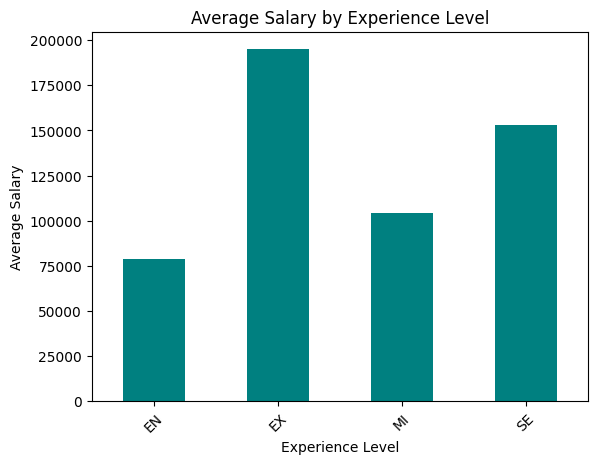

In [7]:
# I will use salary_in_usd because it is the standard currency

avg_salary = salary_df.groupby('experience_level')['salary_in_usd'].mean()
#avg_salary

avg_salary.plot(kind='bar', color='teal')
plt.title('Average Salary by Experience Level')
plt.ylabel('Average Salary')
plt.xlabel('Experience Level')
plt.xticks(rotation=45)
plt.show()

> Excecutive Level had the highest average salary. Followed by Senior Level, then Mid Level. Entry Level is the lowest with 75k salary average.

## 🧹 Part 3: Data Preprocessing for Linear Regression

We will predict `salary_in_usd` using **only numerical or encoded categorical features**.

### Steps:
1. Select features: `work_year`, `experience_level`, and optionally `job_title` (you decide!)
2. Encode categorical variables (`experience_level`) using `LabelEncoder` or `pd.get_dummies()`
3. Define `X` (features) and `y` (target = `salary_in_usd`)

> ⚠️ **Important**: Do NOT include `salary`, `salary_currency`, or `salary_in_usd` in your features!

In [8]:
# Example: Encode experience_level
le = LabelEncoder()
salary_df['experience_level_encoded'] = le.fit_transform(salary_df['experience_level'])

# Trying to add job_title
# le_jobtitle = LabelEncoder()
# salary_df['job_title_encoded'] = le.fit_transform(salary_df['job_title'])

#I wont include the job_title on the features because I tried earlier and the prediction shows an error

# Choose your features
features = ['work_year', 'experience_level_encoded']
X = salary_df[features]
y = salary_df['salary_in_usd']

# Optional: Add more features like job_title (try it!)
# But remember: too many categories can hurt performance

X.head()

,work_year,experience_level_encoded
0,2023,0
1,2023,0
2,2023,0
3,2023,0
4,2023,0


## 📈 Part 4: Train a Linear Regression Model

In [9]:
# Split data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R² Score: 0.15
RMSE: 59164.82


## 🔮 Part 5: Predict 2024 Salaries

Now, create a small DataFrame for **2024** with different experience levels and predict their salaries.

Use the same encoding as before!

In [10]:
# Map experience levels to encoded values (check your LabelEncoder!)
# Example: EN=0, MI=1, SE=2, EX=3 (confirm with `le.classes_`)

future_data = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_encoded': [0, 1, 2, 3]  # EN, MI, SE, EX
})

# Predict
predicted_salaries = model.predict(future_data)

# Display results
results = pd.DataFrame({
    'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
    'Predicted 2024 Salary (USD)': predicted_salaries
})
results

,Experience Level,Predicted 2024 Salary (USD)
0,Entry,111694.914909
1,Mid,131967.434578
2,Senior,152239.954247
3,Executive,172512.473916


## 📝 Part 6: Reflection (Answer in a Markdown Cell)

1. Does your model make reasonable predictions? Why or why not?
- My opinion is half-half. Somehow, the predictions are reasonable enough because data is the new gold now and companies in general would pay thousands of dollars for a data scientist. Also, I've check this online to see if the prediction were actually right and the prediction somehow fall right in the middle of the ranges, but still not quite right if we're talking abour real salaries. Moreover, the predictions are too broad because we've only used two features. That's why the model might also not be reasonable because we've only trained two features and excluded the other important factors that would greatly make a change.

3. What are the limitations of using only `work_year` and `experience_level`?
- The predictions are too general and broad. It can't specify any important details like the job title, the company location, etc. Using only two features can't pinpoint the salary accuracy because we missed the other important factors which the typically salary depends on.

4. How could you improve this model? (Think: more features, better encoding, etc.)
- To improve this model, we need to add more features (job title, employment type, company location, company size). Also, I think using other methods because I looked up "pd.get_dummies()" because it was mentioned earlier and I learned it was more accurate but heavier. Another thing is to add more data on the dataset if possible to strengthen it.

5. Why is **R² not enough** to trust your predictions?
- First of all, we are predicting important matters that's why we need everthing, every metrics not just r-squared to make sure the prediction is realiable. Second, I learned that r-squared is only good with past data and not future data. Third, it ignores errros or real world accuracy, that's why we also check the RMSE (root mean square error) to know how far off the guesses are, and in our model we are off by almost 60k dollars.

> 💡 Remember: Linear regression assumes a **linear trend**—but real salaries may grow non-linearly!